In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import random

In [5]:
def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASHEED'] = str(seed)
  np.random.seed(seed)
seed_everything(42)

In [6]:
dataPath = 'D:\\Data\\LGAI_AutoDriveSensors\\'

#import train and test CSV files
train = pd.read_csv(dataPath+'train.csv')
test = pd.read_csv(dataPath+"test.csv")

In [7]:
train_x = train.filter(regex='X')
train_y = train.filter(regex = "Y")

---

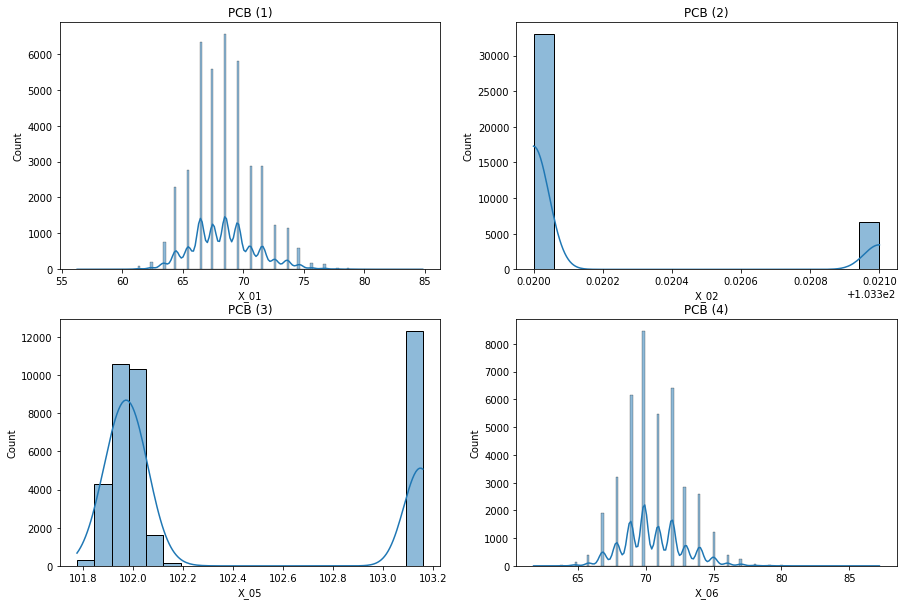

In [9]:
pcb = train_x[['X_01','X_02','X_05','X_06']]

# PCB 체결 시 단계별 누름량
fig, axes = plt.subplots(2,2, figsize = (15,10))

sns.histplot(data = pcb, x = "X_01", kde = True, ax = axes[0,0]).set(title = "PCB (1)")
sns.histplot(data = pcb, x = "X_02", kde = True, ax = axes[0,1]).set(title = "PCB (2)")
sns.histplot(data = pcb, x = "X_05", kde = True, ax = axes[1,0]).set(title = "PCB (3)")
sns.histplot(data = pcb, x = "X_06", kde = True, ax = axes[1,1]).set(title = "PCB (4)")

plt.show()

[Text(0.5, 1.0, 'Heating material area and weight')]

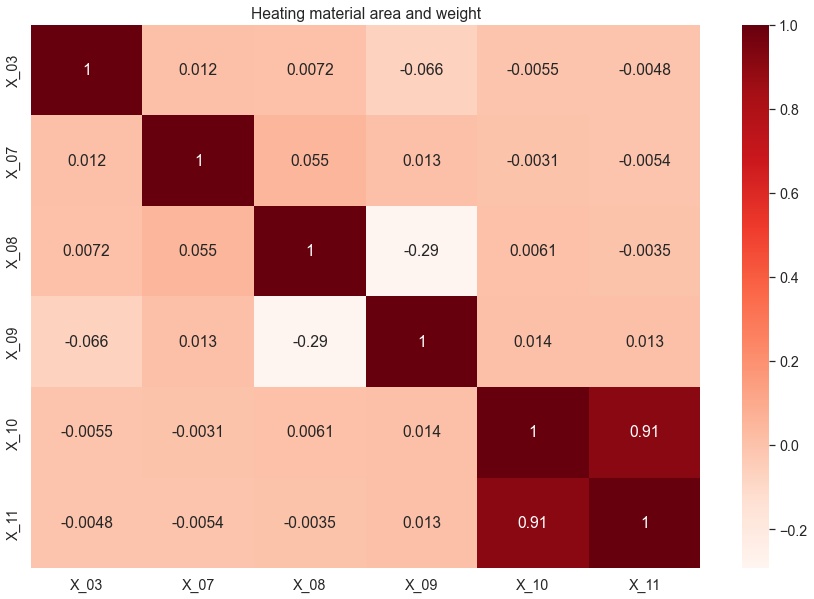

In [11]:
# 방열 재료 1 면적 및 무게
heat = train_x[['X_03', 'X_07', 'X_08', 'X_09', 'X_10', 'X_11']]

plt.figure(figsize = (15,10))

sns.set(font_scale = 1.3)

ax = plt.axes()
sns.heatmap(heat.corr(),annot = True, cmap = 'Reds', ax = ax).set(title = "Heating material area and weight")

Text(0.5, 0.98, 'Antenna Pad Location')

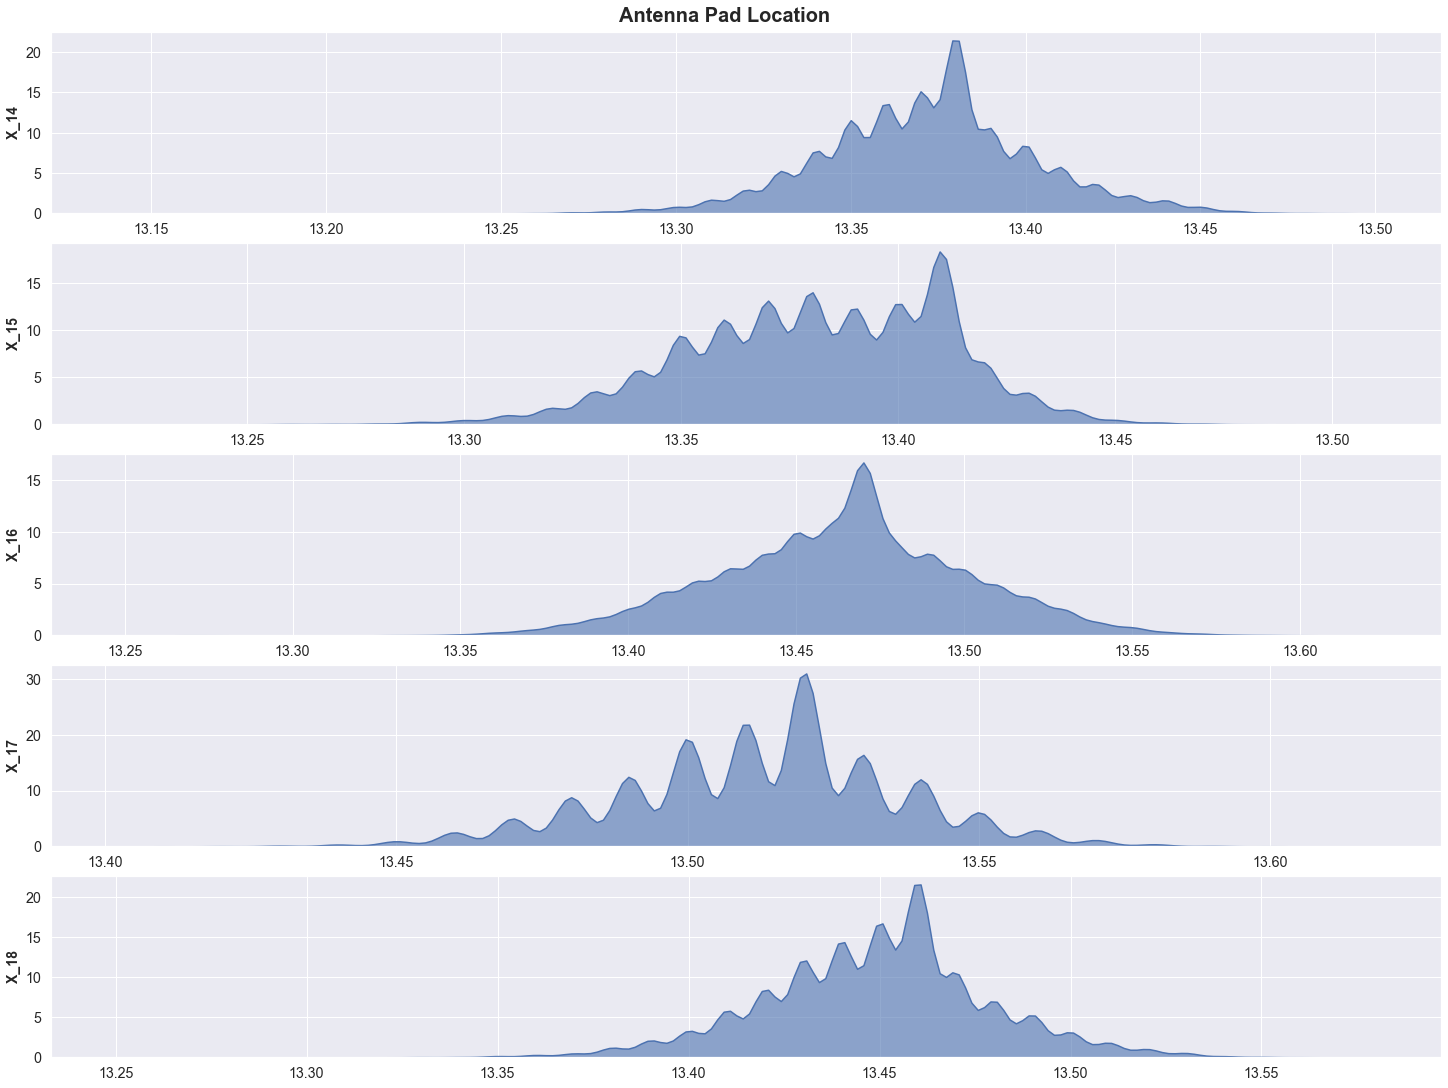

In [12]:
# 안테나 패드 위치

antenna = train_x[['X_14','X_15','X_16','X_17','X_18']]

type_col = ['X_14','X_15','X_16','X_17','X_18']

fig, ax = plt.subplots(5, 1, figsize=(20,15), constrained_layout = True)

for i, col in enumerate(type_col):
  sns.kdeplot(x = col, data = antenna, fill = True, alpha = 0.6, linewidth = 1.5, ax = ax[i])
  ax[i].set_xlabel(None)
  ax[i].set_ylabel(col, size = 14, weight = 'bold')

fig.suptitle('Antenna Pad Location', size = 20, weight = 'bold')

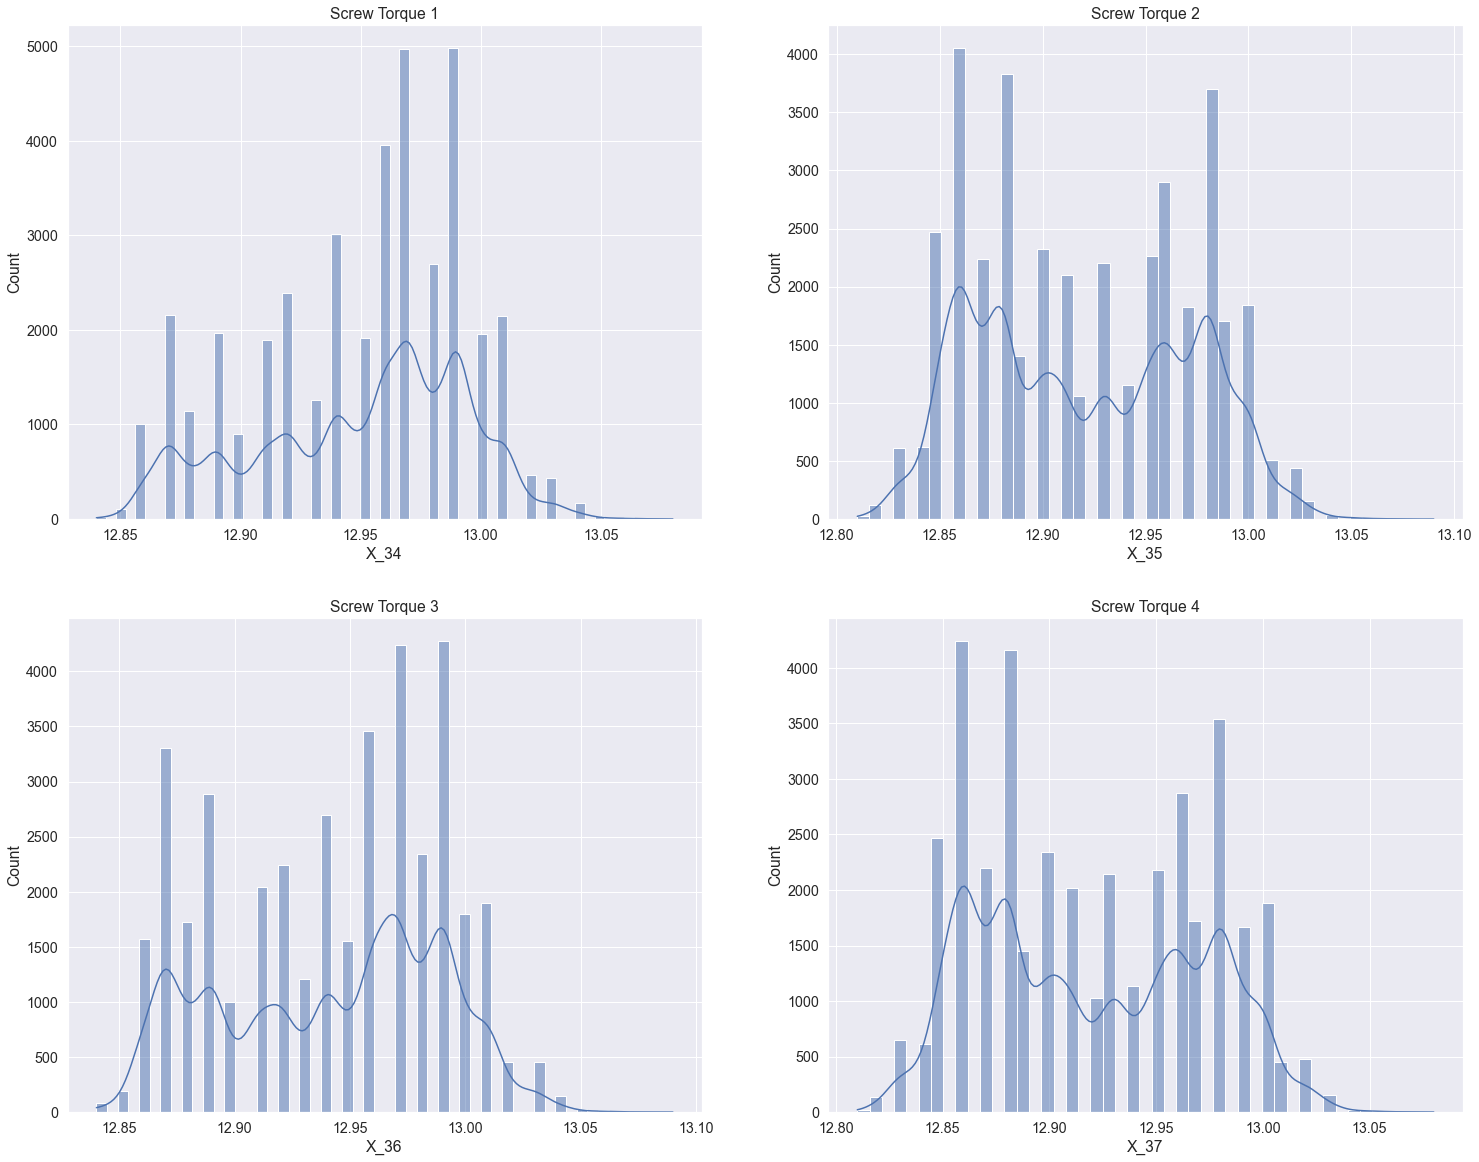

In [13]:
screw = train_x[['X_34','X_35','X_36','X_37']]

# 스크류 체결 시 분당 회전수

fig, axes = plt.subplots(2,2, figsize = (25,20))

sns.histplot(data = screw, x = "X_34", kde = True, ax = axes[0,0]).set(title = "Screw Torque 1")
sns.histplot(data = screw, x = "X_35", kde = True, ax = axes[0,1]).set(title = "Screw Torque 2")
sns.histplot(data = screw, x = "X_36", kde = True, ax = axes[1,0]).set(title = "Screw Torque 3")
sns.histplot(data = screw, x = "X_37", kde = True, ax = axes[1,1]).set(title = "Screw Torque 4")

plt.show()

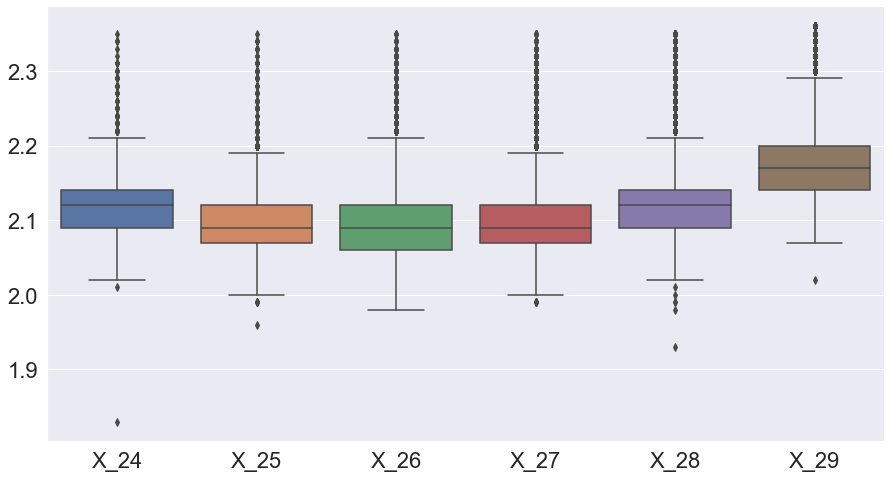

In [14]:
# 커넥트 핀 치수 
connector = train_x[['X_24','X_25','X_26','X_27','X_28','X_29']]

sns.set(font_scale = 2)
plt.figure(figsize = (15,8))
sns.boxplot(data = connector)
plt.show()

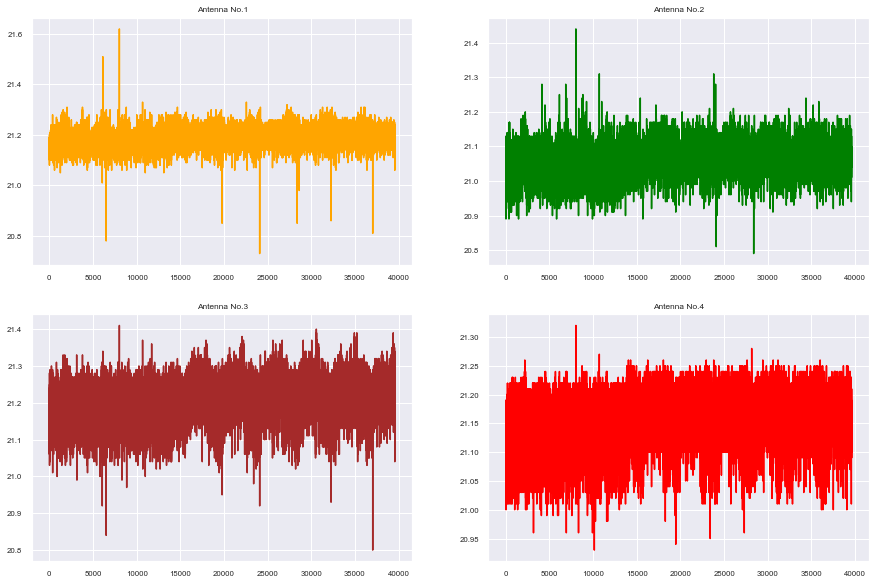

In [15]:
#레이돔 치수 

radome = train_x[['X_41','X_42','X_43','X_44']]


sns.set(font_scale = 0.7)

fig, axes = plt.subplots(2,2, figsize = (15,10))
axes[0,0].plot(radome['X_41'],label = radome['X_41'], color = "orange")
axes[0,0].set_title('Antenna No.1')
axes[0,1].plot(radome['X_42'],label = radome['X_42'], color = "green")
axes[0,1].set_title('Antenna No.2')
axes[1,0].plot(radome['X_43'],label = radome['X_43'], color = "brown")
axes[1,0].set_title('Antenna No.3')
axes[1,1].plot(radome['X_44'],label = radome['X_44'], color = "red")
axes[1,1].set_title('Antenna No.4')

plt.show()

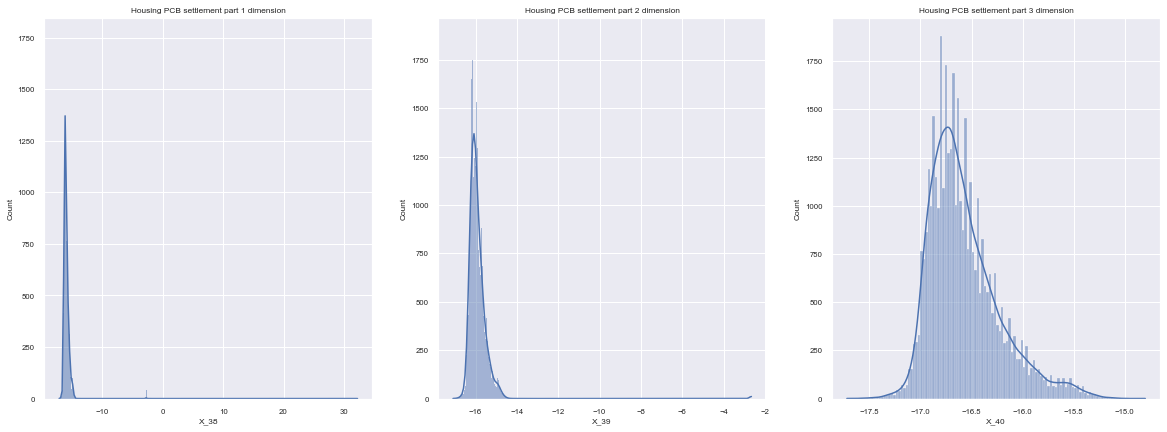

In [16]:
#하우징 PCB 안착부 치수 

housing = train_x[['X_38','X_39','X_40']]

sns.set(font_scale = 0.7)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,7))

sns.histplot(data = housing, x = "X_38", kde = True, ax = ax1).set(title = "Housing PCB settlement part 1 dimension")
sns.histplot(data = housing, x = "X_39", kde = True, ax = ax2).set(title = "Housing PCB settlement part 2 dimension")
sns.histplot(data = housing, x = "X_40", kde = True, ax = ax3).set(title = "Housing PCB settlement part 3 dimension")

plt.show()

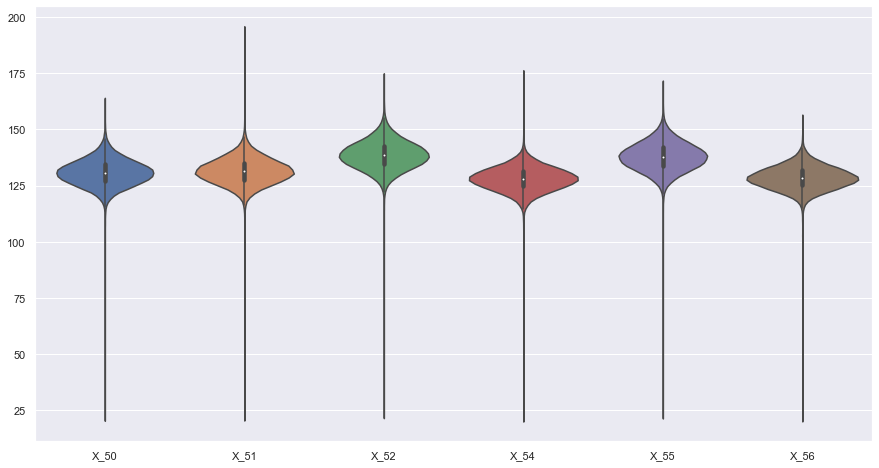

In [17]:
# RF1 part SMT lead volume

smt = train_x[[ 'X_50', 'X_51', 'X_52', 'X_54', 'X_55', 'X_56']]

rf = ['X_50', 'X_51', 'X_52', 'X_54', 'X_55', 'X_56']

sns.set(font_scale = 1)
plt.figure(figsize = (15,8))
sns.violinplot(data = smt)
plt.show()

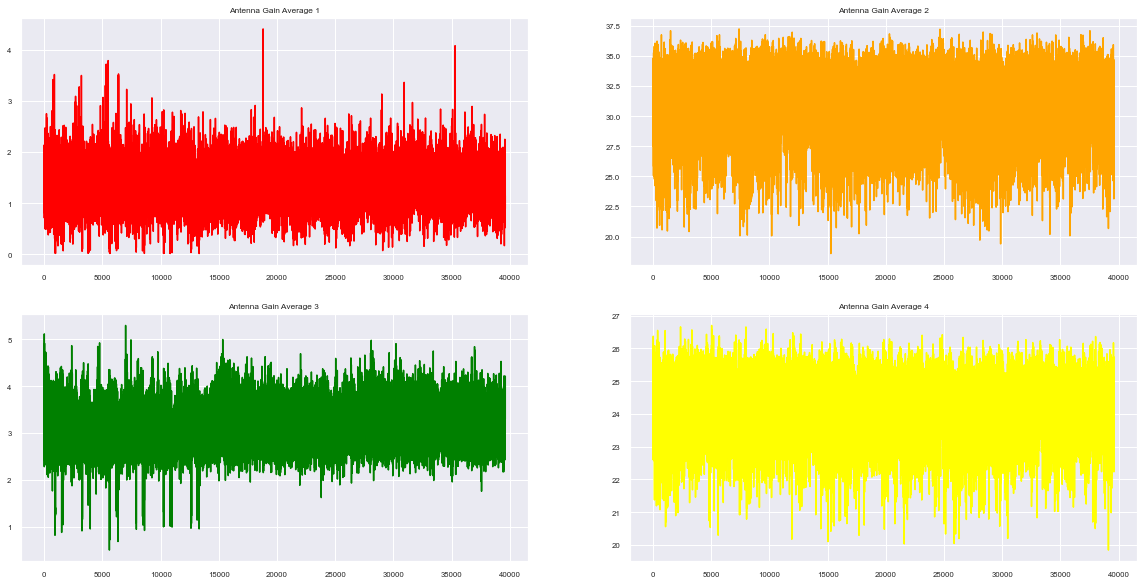

In [18]:
#안테나 Gain 평균 (각도1, 각도2, 각도3, 각도 4) 

gain = train_y[['Y_01', 'Y_05', 'Y_07','Y_11']]

sns.set(font_scale = 0.7)

fig, axes = plt.subplots(2,2, figsize = (20,10))
axes[0,0].plot(gain['Y_01'],label = gain['Y_01'], color = "red")
axes[0,0].set_title('Antenna Gain Average 1')
axes[0,1].plot(gain['Y_05'],label = gain['Y_05'], color = "orange")
axes[0,1].set_title("Antenna Gain Average 2")
axes[1,0].plot(gain['Y_07'],label = gain['Y_07'], color = "green")
axes[1,0].set_title("Antenna Gain Average 3 ")
axes[1,1].plot(gain['Y_11'],label = gain['Y_11'], color = "yellow")
axes[1,1].set_title("Antenna Gain Average 4")

plt.show()